<a href="https://colab.research.google.com/github/nek96/t-SNE_Dimensionality-reduction-method-applying-on-Glove.50d.text-2000-words-vector-/blob/main/PCA%2Ct_SNE%2CUMAR_Glove_50d_text(2000_word).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA Mean Squared Error Percentage: 47.90%
Continuity: 1.0064098740554153
Trustworthiness: 1.0064941729638954


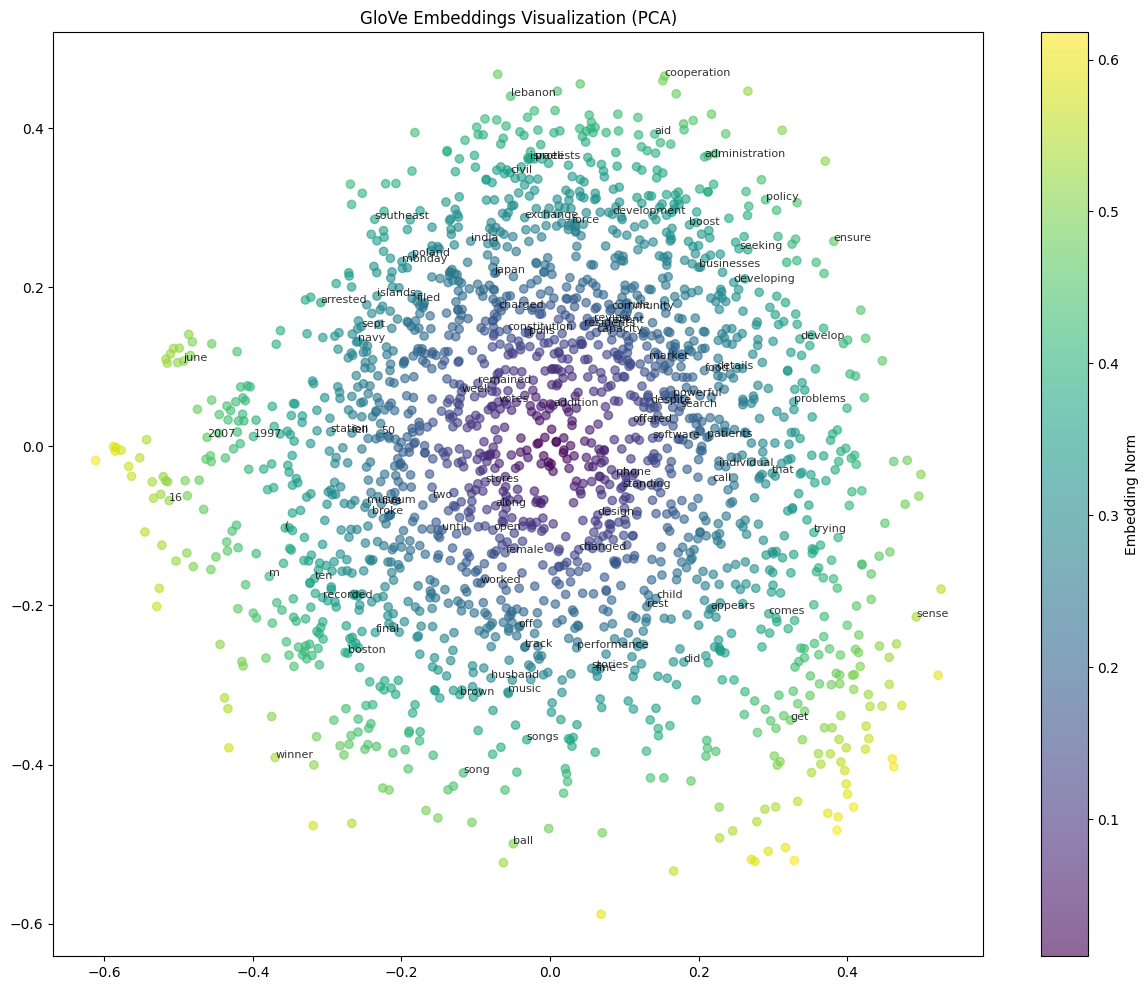

In [4]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances, mean_squared_error

# ======================
# GloVe Data Loader (Corrected)
# ======================
class GloVeLoader:
    def __init__(self, file_path, max_words=2000):
        self.file_path = file_path
        self.max_words = max_words

    def load(self):
        """Load and normalize GloVe embeddings"""
        words, vectors = [], []
        with open(self.file_path, 'r', encoding='utf-8') as f:
            for idx, line in enumerate(f):
                if idx >= self.max_words:
                    break
                parts = line.strip().split()
                words.append(parts[0])
                vectors.append(np.array(parts[1:], dtype=np.float32))

        vectors = np.array(vectors)
        vectors = vectors / np.linalg.norm(vectors, axis=1, keepdims=True)
        return words, vectors

# ======================
# PCA Method
# ======================
def apply_pca(vectors, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_vectors = pca.fit_transform(vectors)
    reconstructed_vectors = pca.inverse_transform(reduced_vectors)

    mse = np.mean((vectors - reconstructed_vectors) ** 2)
    mse_percentage = mse / np.mean(vectors ** 2) * 100

    return reduced_vectors, mse_percentage

# ======================
# Visualization Function
# ======================
def visualize_glove_embeddings(words, embeddings):
    plt.figure(figsize=(15, 12))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], alpha=0.6, c=np.linalg.norm(embeddings, axis=1))

    # Annotate sample words
    indices = np.random.choice(len(words), 100, replace=False)
    for i in indices:
        plt.annotate(words[i], (embeddings[i, 0], embeddings[i, 1]), fontsize=8, alpha=0.8)

    plt.colorbar(label='Embedding Norm')
    plt.title("GloVe Embeddings Visualization (PCA)")
    plt.show()

# ======================
# Continuity and Trustworthiness Functions
# ======================
def continuity_and_trustworthiness(X, X_embedded, n_neighbors=15):
    D_high = pairwise_distances(X)
    D_low = pairwise_distances(X_embedded)

    n = X.shape[0]
    rank_high = np.argsort(D_high, axis=1)[:, 1:n_neighbors+1]
    rank_low = np.argsort(D_low, axis=1)[:, 1:n_neighbors+1]

    continuity_sum = 0
    trustworthiness_sum = 0

    for i in range(n):
        high_neighbors = set(rank_high[i])
        low_neighbors = set(rank_low[i])

        missing_neighbors = high_neighbors - low_neighbors
        extra_neighbors = low_neighbors - high_neighbors

        for m in missing_neighbors:
            rank_m = np.where(rank_high[i] == m)[0][0] + 1
            continuity_sum += (rank_m - n_neighbors) / (n - n_neighbors)

        for e in extra_neighbors:
            rank_e = np.where(rank_low[i] == e)[0][0] + 1
            trustworthiness_sum += (rank_e - n_neighbors) / (n - n_neighbors)

    continuity = 1 - (2 / (n * n_neighbors)) * continuity_sum
    trustworthiness = 1 - (2 / (n * n_neighbors)) * trustworthiness_sum

    return continuity, trustworthiness

# ======================
# Execution (Corrected)
# ======================
if __name__ == "__main__":
    # Configuration
    GLOVE_PATH = 'glove.6B.50d.txt'
    MAX_WORDS = 2000

    # Load data
    loader = GloVeLoader(GLOVE_PATH, max_words=MAX_WORDS)
    words, vectors = loader.load()

    # Apply PCA
    reduced_vectors, mse_percentage = apply_pca(vectors, n_components=2)

    # Output MSE percentage
    print(f"PCA Mean Squared Error Percentage: {mse_percentage:.2f}%")

    # Calculate and print continuity and trustworthiness
    continuity, trustworthiness = continuity_and_trustworthiness(vectors, reduced_vectors)
    print("Continuity:", continuity)
    print("Trustworthiness:", trustworthiness)

    # Visualize results
    visualize_glove_embeddings(words, reduced_vectors)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Continuity: 1.0037097565071367
Trustworthiness: 1.0039680604534003
Mean Squared Error (MSE): 11.980062484741211


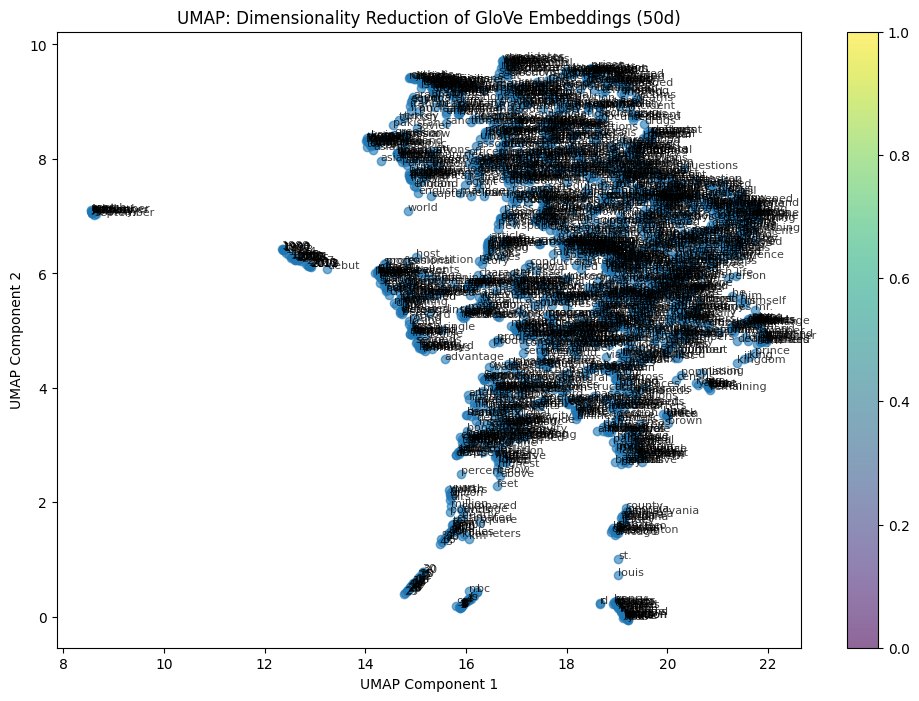

In [8]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances, mean_squared_error

# ======================
# GloVe Data Loader
# ======================
class GloVeLoader:
    def __init__(self, file_path, max_words=2000):
        self.file_path = file_path
        self.max_words = max_words

    def load(self):
        """Load and normalize GloVe embeddings"""
        words, vectors = [], []
        with open(self.file_path, 'r', encoding='utf-8') as f:
            for idx, line in enumerate(f):
                if idx >= self.max_words:
                    break
                parts = line.strip().split()
                words.append(parts[0])
                vectors.append(np.array(parts[1:], dtype=np.float32))

        vectors = np.array(vectors)
        vectors = vectors / np.linalg.norm(vectors, axis=1, keepdims=True)
        return words, vectors

# Path to the GloVe embeddings file (update the path to your local file)
glove_file_path = 'glove.6B.50d.txt'

# Load the GloVe embeddings
loader = GloVeLoader(glove_file_path, max_words=2000)
words, vectors = loader.load()

# ======================
# UMAP Method
# ======================
umap_model = umap.UMAP(n_components=2, random_state=42)

# Apply UMAP for dimensionality reduction
vectors_umap = umap_model.fit_transform(vectors)

# ======================
# Continuity and Trustworthiness Functions
# ======================
def continuity_and_trustworthiness(X, X_embedded, n_neighbors=15):
    D_high = pairwise_distances(X)
    D_low = pairwise_distances(X_embedded)

    n = X.shape[0]
    rank_high = np.argsort(D_high, axis=1)[:, 1:n_neighbors+1]
    rank_low = np.argsort(D_low, axis=1)[:, 1:n_neighbors+1]

    continuity_sum = 0
    trustworthiness_sum = 0

    for i in range(n):
        high_neighbors = set(rank_high[i])
        low_neighbors = set(rank_low[i])

        missing_neighbors = high_neighbors - low_neighbors
        extra_neighbors = low_neighbors - high_neighbors

        for m in missing_neighbors:
            rank_m = np.where(rank_high[i] == m)[0][0] + 1
            continuity_sum += (rank_m - n_neighbors) / (n - n_neighbors)

        for e in extra_neighbors:
            rank_e = np.where(rank_low[i] == e)[0][0] + 1
            trustworthiness_sum += (rank_e - n_neighbors) / (n - n_neighbors)

    continuity = 1 - (2 / (n * n_neighbors)) * continuity_sum
    trustworthiness = 1 - (2 / (n * n_neighbors)) * trustworthiness_sum

    return continuity, trustworthiness

# Function to calculate MSE between high-dimensional and low-dimensional distances
def calculate_mse(X, X_embedded):
    D_high = pairwise_distances(X)
    D_low = pairwise_distances(X_embedded)
    mse = mean_squared_error(D_high, D_low)
    return mse

# Calculate and print continuity, trustworthiness, and MSE
continuity, trustworthiness = continuity_and_trustworthiness(vectors, vectors_umap)
mse = calculate_mse(vectors, vectors_umap)

print("Continuity:", continuity)
print("Trustworthiness:", trustworthiness)
print("Mean Squared Error (MSE):", mse)

# ======================
# Visualization
# ======================
plt.figure(figsize=(12, 8))
scatter = plt.scatter(vectors_umap[:, 0], vectors_umap[:, 1], alpha=0.6)
for i, word in enumerate(words):
    plt.annotate(word, (vectors_umap[i, 0], vectors_umap[i, 1]), fontsize=8, alpha=0.75)
plt.colorbar(scatter)
plt.title('UMAP: Dimensionality Reduction of GloVe Embeddings (50d)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


In [7]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


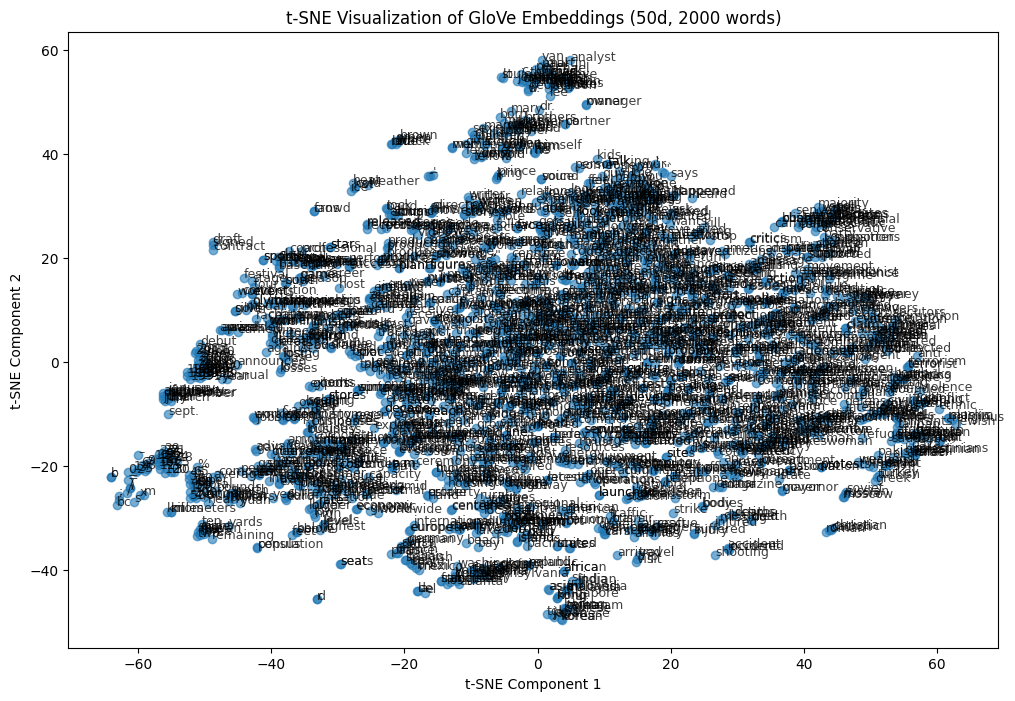

Continuity: 1.0035462636439965
Trustworthiness: 1.0034071536523927
Mean Squared Error (MSE): 2040.048095703125


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances, mean_squared_error

# Load GloVe embeddings
def load_glove_embeddings(file_path, max_words=2000):
    embeddings_index = {}
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for i, line in enumerate(f):
                if i >= max_words:
                    break
                values = line.split()
                word = values[0]
                vector = np.array(values[1:], dtype='float32')
                embeddings_index[word] = vector
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    return embeddings_index

# Path to the GloVe embeddings file (update the path to your local file)
glove_file_path = 'glove.6B.50d.txt'

# Load the GloVe embeddings (limited to 2000 words)
glove_embeddings = load_glove_embeddings(glove_file_path, max_words=2000)

# Extract the words and their corresponding embeddings
words = list(glove_embeddings.keys())
embeddings = np.array([glove_embeddings[word] for word in words])

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)

# Fit and transform the embeddings
tsne_results = tsne.fit_transform(embeddings)

# Plot the results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.6)
for i, word in enumerate(words):
    plt.annotate(word, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9, alpha=0.75)
plt.title('t-SNE Visualization of GloVe Embeddings (50d, 2000 words)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Function to calculate continuity and trustworthiness
def continuity_and_trustworthiness(X, X_embedded, n_neighbors=15):
    D_high = pairwise_distances(X)
    D_low = pairwise_distances(X_embedded)

    n = X.shape[0]
    rank_high = np.argsort(D_high, axis=1)[:, 1:n_neighbors+1]
    rank_low = np.argsort(D_low, axis=1)[:, 1:n_neighbors+1]

    continuity_sum = 0
    trustworthiness_sum = 0

    for i in range(n):
        high_neighbors = set(rank_high[i])
        low_neighbors = set(rank_low[i])

        missing_neighbors = high_neighbors - low_neighbors
        extra_neighbors = low_neighbors - high_neighbors

        for m in missing_neighbors:
            rank_m = np.where(rank_high[i] == m)[0][0] + 1
            continuity_sum += (rank_m - n_neighbors) / (n - n_neighbors)

        for e in extra_neighbors:
            rank_e = np.where(rank_low[i] == e)[0][0] + 1
            trustworthiness_sum += (rank_e - n_neighbors) / (n - n_neighbors)
            continuity = 1 - (2 / (n * n_neighbors)) * continuity_sum
    trustworthiness = 1 - (2 / (n * n_neighbors)) * trustworthiness_sum

    return continuity, trustworthiness

# Function to calculate MSE between high-dimensional and low-dimensional distances
def calculate_mse(X, X_embedded):
    D_high = pairwise_distances(X)
    D_low = pairwise_distances(X_embedded)
    mse = mean_squared_error(D_high.flatten(), D_low.flatten())  # Flatten for MSE calculation
    return mse

# Calculate and print continuity, trustworthiness, and MSE
continuity, trustworthiness = continuity_and_trustworthiness(embeddings, tsne_results)
mse = calculate_mse(embeddings, tsne_results)

print("Continuity:", continuity)
print("Trustworthiness:", trustworthiness)
print("Mean Squared Error (MSE):", mse)

